In [5]:
import pandas as pd
import pickle
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import torch
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from matplotlib import pyplot
import torch

In [6]:
def roc(ytest, prob_list):
    # generate a no skill prediction (majority class)

    ns_probs = [0 for _ in range(len(list(ytest)))]

    
    # keep probabilities for the positive outcome only
    lr_probs = prob_list[:, 1]
    # calculate scores
    ns_auc = roc_auc_score(list(ytest), ns_probs)
    lr_auc = roc_auc_score(list(ytest), lr_probs)
    # summarize scores
    print('No Skill: ROC AUC=%.3f' % (ns_auc))
    print('Logistic: ROC AUC=%.3f' % (lr_auc))
    # calculate roc curves
    ns_fpr, ns_tpr, _ = roc_curve(list(ytest), ns_probs)
    lr_fpr, lr_tpr, _ = roc_curve(list(ytest), lr_probs)
    # plot the roc curve for the model
    pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
    pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
    # axis labels
    pyplot.xlabel('False Positive Rate')
    pyplot.ylabel('True Positive Rate')
    # show the legend
    pyplot.legend()
    # show the plot
    pyplot.show()

In [7]:
def recall_precision(testy, lr_probs):
    # predict class values   
    lr_precision, lr_recall, _ = precision_recall_curve(testy, lr_probs)
    lr_auc =  auc(lr_recall, lr_precision)
    # summarize scores
    print('Logistic: auc=%.3f' % (lr_auc))
    # plot the precision-recall curves
    no_skill = len(testy[testy==1]) / len(testy)
    pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
    pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic')
    # axis labels
    pyplot.xlabel('Recall')
    pyplot.ylabel('Precision')
    # show the legend
    pyplot.legend()
    # show the plot
    pyplot.show()

# Data Loading

In [8]:
import joblib

X_train_eng = joblib.load("models/X_and_y/X_train_eng.pkl") 
X_test_eng = joblib.load("models/X_and_y/X_test_eng.pkl") 
y_train_eng = joblib.load("models/X_and_y/y_train_eng.pkl")
y_test_eng = joblib.load("models/X_and_y/y_test_eng.pkl")


In [9]:
val = torch.load('val_es_text_only_labse_bert_embedded.pkl')
val = [x.numpy().reshape(-1) for x in val]

val_path = '../../data/val_es_toxic.csv' 
val_set = pd.read_csv(val_path)

# Logistic regression

# Train results

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.976


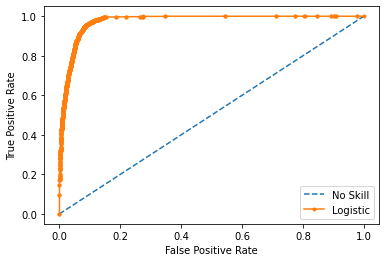

In [12]:
roc(y_train_eng, pipe.predict_proba(X_train_eng))

## Test - English only

In [10]:
pipe = joblib.load("models/Logistic_Regression/logistic_regression_LABSE_embedded.pkl")

In [11]:
from sklearn.metrics import classification_report

target_names = ['class 0', 'class 1']

print(classification_report(pipe.predict(X_test_eng), y_test_eng, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.89      0.98      0.93      5443
     class 1       0.81      0.45      0.58      1157

    accuracy                           0.89      6600
   macro avg       0.85      0.71      0.76      6600
weighted avg       0.88      0.89      0.87      6600



### ROC

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.926


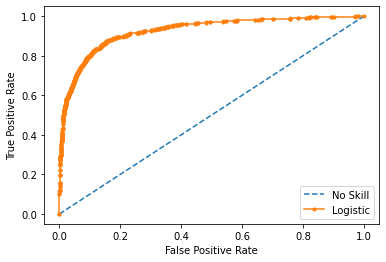

In [10]:
roc(y_test_eng, pipe.predict_proba(X_test_eng))

### precision recall

Logistic: auc=0.707


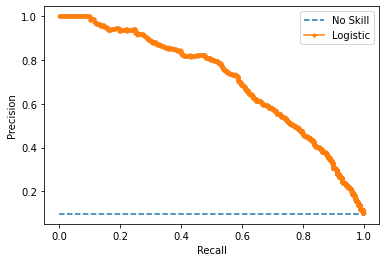

In [11]:
lr_probs = pipe.predict_proba(X_test_eng)
lr_probs = lr_probs[:, 1]
recall_precision(y_test_eng, lr_probs)

## Test- Spanish only

In [12]:
from sklearn.metrics import classification_report

target_names = ['class 0', 'class 1']

print(classification_report(pipe.predict(val), list(val_set.toxic), target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.81      0.94      0.87      1804
     class 1       0.72      0.44      0.55       696

    accuracy                           0.80      2500
   macro avg       0.77      0.69      0.71      2500
weighted avg       0.79      0.80      0.78      2500



### ROC

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.854


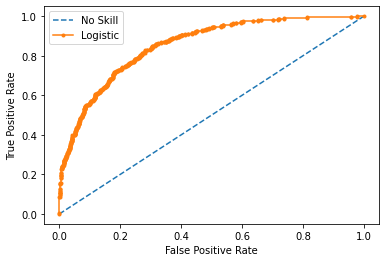

In [14]:
roc(val_set.toxic, pipe.predict_proba(val))

### precision recall

Logistic: auc=0.601


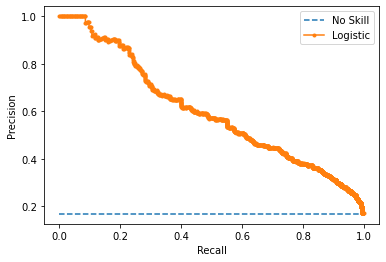

In [15]:
lr_probs = pipe.predict_proba(val)
lr_probs = lr_probs[:, 1]
recall_precision(val_set.toxic, lr_probs)

# MLP Classifier

## Test - English only

In [17]:
pipe = joblib.load("models/MLP_Classifier/MLP_Classifier_LABSE_embedded.pkl")

In [18]:
from sklearn.metrics import classification_report

target_names = ['class 0', 'class 1']

print(classification_report(pipe.predict(X_test_eng), y_test_eng, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.98      0.96      0.97      6083
     class 1       0.60      0.74      0.66       517

    accuracy                           0.94      6600
   macro avg       0.79      0.85      0.81      6600
weighted avg       0.95      0.94      0.94      6600



### ROC

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.940


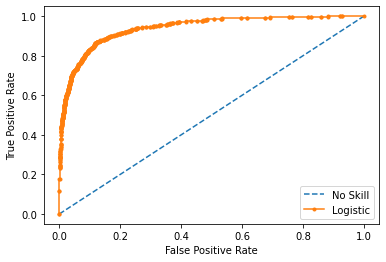

In [19]:
roc(y_test_eng, pipe.predict_proba(X_test_eng))

### precision recall

Logistic: auc=0.746


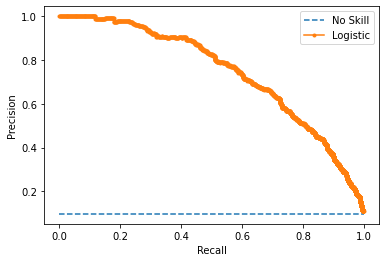

In [20]:
lr_probs = pipe.predict_proba(X_test_eng)
lr_probs = lr_probs[:, 1]
recall_precision(y_test_eng, lr_probs)

## Test- Spanish only

In [21]:
from sklearn.metrics import classification_report

target_names = ['class 0', 'class 1']

print(classification_report(pipe.predict(val), list(val_set.toxic), target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.95      0.90      0.92      2191
     class 1       0.47      0.64      0.54       309

    accuracy                           0.87      2500
   macro avg       0.71      0.77      0.73      2500
weighted avg       0.89      0.87      0.87      2500



### ROC

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.864


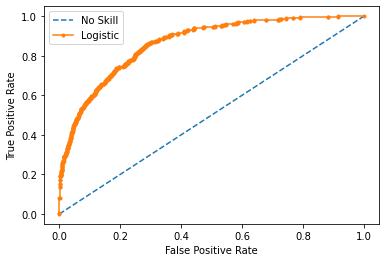

In [22]:
roc(val_set.toxic, pipe.predict_proba(val))

### precision recall

Logistic: auc=0.627


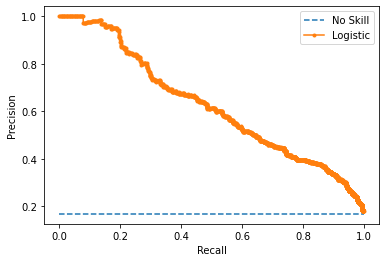

In [23]:
lr_probs = pipe.predict_proba(val)
lr_probs = lr_probs[:, 1]
recall_precision(val_set.toxic, lr_probs)

# Neural Network

In [24]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models

class net(nn.Module):

    def __init__(self):

        super(net, self).__init__()
        # dropout layer
        self.dropout = nn.Dropout(0.1)
        # relu activation function
        self.relu =  nn.ReLU()
        # dense layer 1
        self.fc1 = nn.Linear(768,512)
        # dense layer 2 (Output layer)
        self.fc2 = nn.Linear(512,2)
        #softmax activation function
        self.softmax = nn.LogSoftmax(dim=1)
    
    #define the forward pass
    def forward(self, in_vec):
        
        #pass the inputs to the model  
        x = self.fc1(in_vec)
        x = self.relu(x)
        x = self.dropout(x)
        # output layer
        x = self.fc2(x)
        # apply softmax activation
        x = self.softmax(x)

        return x

In [25]:
import torch.utils.data as data_utils

tensor_x_train = torch.from_numpy(np.array(X_train_eng)) # transform to torch tensor
tensor_y_train = torch.from_numpy(np.array(y_train_eng))

tensor_x_val = torch.from_numpy(np.array(X_test_eng)) # transform to torch tensor
tensor_y_val = torch.from_numpy(np.array(y_test_eng))

datasets = {'train':data_utils.TensorDataset(tensor_x_train, tensor_y_train) ,'val':data_utils.TensorDataset(tensor_x_val, tensor_y_val)  }


dataloaders_my = {
    'train': torch.utils.data.DataLoader(datasets['train'], batch_size=16,
                                             shuffle=True, num_workers=2),
    'val': torch.utils.data.DataLoader(datasets['val'], batch_size=16,
                                          shuffle=False, num_workers=2)
  }

In [26]:
model = net()
model.load_state_dict(torch.load('models/Neural_Network/saved_weights.pt'))


<All keys matched successfully>

## Test - English only

In [27]:
predlist=torch.zeros(0,dtype=torch.long, device='cpu')
lbllist=torch.zeros(0,dtype=torch.long, device='cpu')
prob_list = []
device = 'cpu'

with torch.no_grad(): # No need to collect gradients when generating predictions
    for i, (inputs, labels) in enumerate(dataloaders_my['val']):
        inputs = inputs.to(device)
        labels = labels.to(device)
        model.eval()
        outputs = model(inputs)
        prob_list.append(np.exp(outputs.cpu().numpy()))
        _, preds = torch.max(outputs, 1)
        
        predlist=torch.cat([predlist, preds.view(-1).cpu()])
        lbllist=torch.cat([lbllist, labels.view(-1).cpu()])

In [28]:
from sklearn.metrics import classification_report

target_names = ['class 0', 'class 1']

print(classification_report(predlist, lbllist, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.92      0.97      0.94      5642
     class 1       0.72      0.48      0.58       958

    accuracy                           0.90      6600
   macro avg       0.82      0.73      0.76      6600
weighted avg       0.89      0.90      0.89      6600



### ROC

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.911


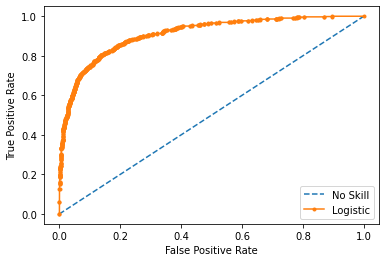

In [29]:
lr_probs = np.vstack(prob_list)
roc(y_test_eng, lr_probs)

### precision recall

Logistic: auc=0.658


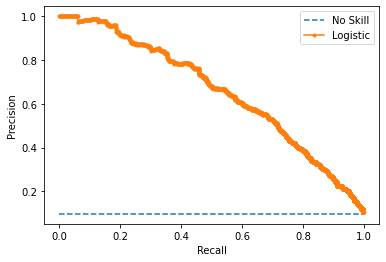

In [30]:
lr_probs_1 = lr_probs[:, 1]
recall_precision(y_test_eng, lr_probs_1)

### Test- Spanish only

In [31]:
tensor_x_val_spanish = torch.from_numpy(np.array(val)) # transform to torch tensor
tensor_y_val_spanish = torch.from_numpy(np.array(val_set.toxic))

datasets_spanish = {'val':data_utils.TensorDataset(tensor_x_val_spanish, tensor_y_val_spanish)  }


dataloaders_spanish = {
    'val': torch.utils.data.DataLoader(datasets_spanish['val'], batch_size=16,
                                          shuffle=False, num_workers=2)
  }

In [32]:
predlist=torch.zeros(0,dtype=torch.long, device='cpu')
lbllist=torch.zeros(0,dtype=torch.long, device='cpu')
prob_list = []
with torch.no_grad(): # No need to collect gradients when generating predictions
    for i, (inputs, labels) in enumerate(dataloaders_spanish['val']):
        inputs = inputs.to(device)
        labels = labels.to(device)
        model.eval()
        outputs = model(inputs)
        prob_list.append(np.exp(outputs.cpu().numpy()))
        _, preds = torch.max(outputs, 1)
        
        predlist=torch.cat([predlist, preds.view(-1).cpu()])
        lbllist=torch.cat([lbllist, labels.view(-1).cpu()])

In [33]:
from sklearn.metrics import classification_report

target_names = ['class 0', 'class 1']

print(classification_report(predlist, lbllist, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.86      0.91      0.88      1962
     class 1       0.59      0.46      0.51       538

    accuracy                           0.81      2500
   macro avg       0.72      0.68      0.70      2500
weighted avg       0.80      0.81      0.81      2500



### ROC

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.820


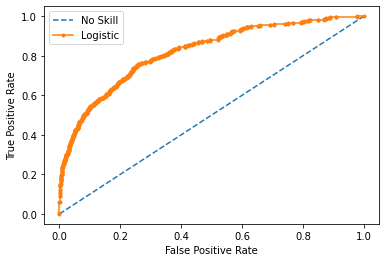

In [34]:
lr_probs = np.vstack(prob_list)
roc(lbllist.numpy(), lr_probs)

### precision recall

Logistic: auc=0.574


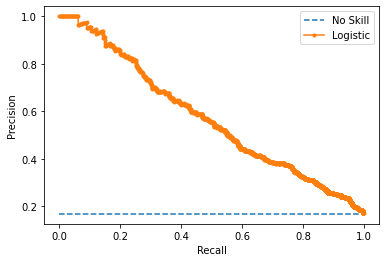

In [35]:
lr_probs_1 = lr_probs[:, 1]
recall_precision(lbllist.numpy(), lr_probs_1)